<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/cetacean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

In [44]:
cetaceans = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/cetacean_data.csv")

def clean_data(df: pd.DataFrame):
  df['entryDate_timestamp'] = pd.to_datetime(df['entryDate'], infer_datetime_format = True)
  return df

cetaceans = clean_data(cetaceans)
cetaceans

,row_number,species,id,name,sex,accuracy,birthYear,acquisition,originDate,originLocation,mother,father,transfers,currently,region,status,statusDate,COD,notes,transferDate,transfer,entryDate,entryDate_timestamp
0,1,Bottlenose,"NOA0004614, AZA 428, MLF-428",Dazzle,F,a,1989,Born,1989-04-07,Marineland Florida,Betty III,Davy II,NaN,Marineland Florida,US,Alive,NaN,NaN,NaN,NaN,US,1989-04-07,1989-04-07
1,2,Bottlenose,"NOA0004386, AZA 138, IDR-73-1",Tursi,F,a,1973,Born,1973-11-26,Dolphin Research Center,Little Bit,Mr. Gipper,NaN,Dolphin Research Center,US,Alive,NaN,NaN,NaN,NaN,US,1973-11-26,1973-11-26
2,3,Bottlenose,"NOA0002137, SWC-TTG-7816",Starbuck,M,a,1978,Born,1978-05-13,SeaWorld San Diego,Cindy (T.t. gilli),Sambo,SeaWorld San Diego to SeaWorld Aurora (??-???-...,SeaWorld Orlando,US,Alive,NaN,NaN,NaN,NaN,US,1978-05-13,1978-05-13
3,4,Bottlenose,"NOA0002690, SWF-TT-7903",Sandy,F,a,1979,Born,1979-02-03,SeaWorld Orlando,Gigi,NaN,SeaWorld Orlando to SeaWorld San Diego (< Aug ...,SeaWorld San Diego,US,Alive,NaN,NaN,NaN,NaN,US,1979-02-03,1979-02-03
4,5,Bottlenose,"NOA0004418, AZA 242, SWF-TT-7904, MH-82-36-TT ...",Sandy,M,a,1979,Born,1979-08-15,SeaWorld Orlando,Wendy,NaN,SeaWorld Orlando to New England Aquarium (22-F...,Dolphin Research Center,US,Alive,NaN,NaN,NaN,NaN,US,1979-08-15,1979-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2190,Bottlenose,NOA0004493,NaN,F,e,1974,Capture,1978-11-04,Unknown,NaN,NaN,NaN,Unknown,US,Died,1978-12-30,hepatic necrosis; pregnant/capture shock,NaN,NaN,US,1978-11-04,1978-11-04
2190,2191,Pacific White-Sided,NOA0002531,NaN,F,u,NaN,Capture,1980-01-15,Unknown,NaN,NaN,NaN,Unknown,US,Died,1992-08-09,Mycotic meningoencephalitis,NaN,NaN,US,1980-01-15,1980-01-15
2191,2192,Bottlenose,NOA0002569,NaN,U,u,NaN,Capture,1972-06-01,Unknown,NaN,NaN,NaN,Unknown,US,Died,1976-12-15,Pancreatitis,NaN,NaN,US,1972-06-01,1972-06-01
2192,2193,Bottlenose,NOA0002680,NaN,F,u,NaN,Capture,1977-05-05,Unknown,NaN,NaN,NaN,Unknown,US,Died,1983-02-07,gastritis; enteritis; old age,NaN,NaN,US,1977-05-05,1977-05-05


Let's see how the species break down

In [7]:
cetaceans['species'].value_counts()

Bottlenose                  1668
Killer Whale; Orca            79
Beluga                        68
White-sided, Pacific          56
Pacific White-Sided           41
Commerson's                   37
Spinner                       36
Beluga Whale                  28
Short-Finned Pilot Whale      25
Pilot, Short-fin              22
Pseudorca                     18
Common                        17
Rough-Toothed                 15
False Killer Whale            11
Pantropical Spotted            8
Long-Finned Pilot Whale        6
Atlantic White- Sided          6
Risso's                        6
White-Beaked                   6
Harbor Porpoise                5
Unspecified Or Porpoise        4
Melon-Headed Whale             4
Spotted, Atlantic              4
Northern Right Whale           3
Unspecified Pilot Whales       3
Pygmy Killer Whale             3
Common; Saddleback             2
Backcross                      2
Pilot, Short-finned            2
Amazon River; Boto             2
Tucuxi    

Looks like there are *way* more bottlenose dolphins than any other kind of cetacean.

 How do the observed cetaceans break down by sex?

In [8]:
cetaceans['sex'].value_counts()

F    1174
M     915
U     105
Name: sex, dtype: int64

Interesting. There are 250 or so more females than there are males.

What if we looked at their age distribution?

In [16]:
cetaceans['birthYear'].value_counts()

1976    42
1985    40
1981    39
1970    39
1980    39
        ..
1942     1
2017     1
1940     1
1946     1
1955     1
Name: birthYear, Length: 77, dtype: int64

What's the status breakdown of alive/deceased/released?

In [15]:
cetaceans['status'].value_counts()

Died                    1558
Alive                    467
Released                 104
Unknown                   42
Stillbirth                15
Miscarriage                5
Released?                  1
Escaped                    1
Escaped (Found Dead)       1
Name: status, dtype: int64

How many of them are currently in Sea World?

In [24]:
cetaceans['currently'].value_counts()

Unknown                                265
U.S. Navy                              206
SeaWorld San Diego                     203
SeaWorld Orlando                       140
Sea Life Park Hawaii                   124
                                      ... 
Navy, US (SPAWAR)                        1
Institute for Marine Mammal Studies      1
Gulfarium                                1
Niagra Aquarium Foundation               1
Massachusetts Audubon Society            1
Name: currently, Length: 97, dtype: int64

☝️ The above tells us that some are at Sea World, but we want to count all the cetaceans at sea world

In [37]:
def is_in_seaworld(location: str):
  match = location.lower().find('seaworld')
  if (match >= 0):
    return True
  else:
    return False

cetaceans['is_currently_in_seaworld'] = cetaceans['currently'].apply(is_in_seaworld)

In [39]:
cetaceans['is_currently_in_seaworld'].value_counts()

False    1750
True      444
Name: is_currently_in_seaworld, dtype: int64

☝️ Wow. 25% of the cetaceans in the dataset were, at the time it was compiled, owned by SeaWorld.

What happens if we take a look at acquisitions over time?

,row_number
entryDate_timestamp,
1946.0,1357
1949.0,657
1952.0,888
1953.0,658
1955.0,1417
...,...
2013.0,7684
2014.0,11105
2015.0,5178


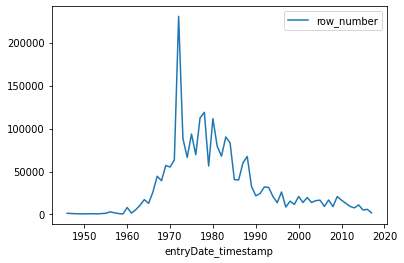

In [66]:
acquisitions_per_year = cetaceans.groupby(cetaceans['entryDate_timestamp'].dt.year)
acquisitions_per_year.sum().plot()
acquisitions_per_year.sum()


And how do those acquisitions break down?

In [55]:
cetaceans['acquisition'].value_counts()

Capture        1214
Born            776
Unknown          95
Rescue           89
Stillbirth       15
Miscarriage       5
Name: acquisition, dtype: int64

How do causes of death break down?

In [67]:
cetaceans['COD'].value_counts()

-                                                                   113
Pneumonia                                                            41
PNEUMONIA                                                            39
Euthanasia                                                           18
Euthanasia: Life threatening condition involving\rpain/suffering     18
                                                                   ... 
CARDIOVASCULAR COLLAPSE; PNEUMONIA                                    1
HEPATIC CIRRHOSIS                                                     1
HYPERPLASIA, DIFFUSE, MARKED, PROSTATE                                1
Neonatal death; no significant findings on necropsy                   1
Infectious myositis, following a jaw fracture                         1
Name: COD, Length: 1002, dtype: int64

☝️ Wow. So in 113 cases, the cause of death was pneumonia. How does that break down by sex?

In [74]:
cetaceans.groupby(['sex', 'COD']).count()

row_number  ...  entryDate_timestamp
sex COD                                                             ...                     
F   (NO RECORD)                                                  2  ...                    0
    -                                                           67  ...                   67
    ABDOMINAL ABSCESS                                            1  ...                    1
    ABSCESS IN MUSCLE TISSUE                                     1  ...                    1
    ABSESS ON HEART                                              1  ...                    1
...                                                            ...  ...                  ...
U   Vaccine reaction                                             2  ...                    2
    acute bacterial septicemia                                   1  ...                    1
    failure to thrive; general organ failure; histo...           1  ...                    1
    gastric blockage                                             1  ...                    1
    momental impact trauma                                       1  ...                    1

[1111 rows x 21 columns]

 How many killer whales are owned by SeaWorld?

In [95]:
mask = cetaceans['species'].apply(lambda x: str(x).lower().find('orca') > 0)
cetaceans[mask]['COD'].value_counts()

-                                                       6
Pneumonia                                               4
Complications following a stillbirth                    2
SEPTICEMIA/also reported as pulmonary abscession        1
Septicemia/also reported as pulmonary abscession        1
                                                       ..
PNUEMONIA                                               1
Pleuritis/Pneumonia from upper respiratory infection    1
Bronchopneumonia                                        1
Perforated stomach                                      1
OLD AGE                                                 1
Name: COD, Length: 63, dtype: int64

Perhaps unsurprisingly, pneumonia tops the list.